In [100]:
from pathlib import Path
from piecharts.data.dataset import PiechartDataset
from piecharts.nn.models.smp_models import PSMModel
import torch


model = PSMModel(False)
state_dict = torch.load('../model_no_center/best.h5')
model.load_state_dict(state_dict)
val_dataset = PiechartDataset(Path("../data") / "raw", "train", "val")



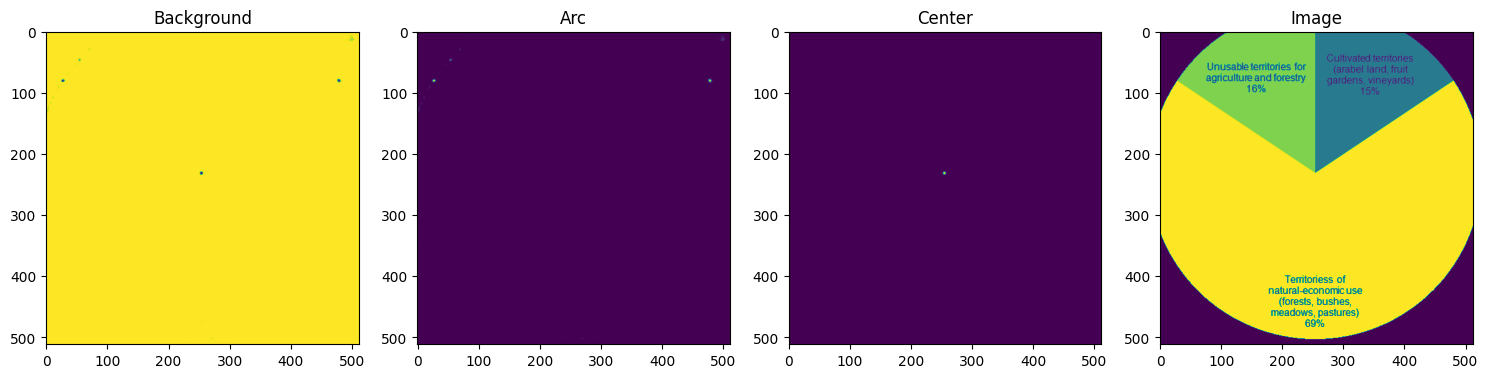

In [108]:
with torch.no_grad():
    x, y_gt = val_dataset[200]
    x = x.cuda()
    model.cuda()
    y_pred = model(x[None])
    
    y = torch.argmax(y_pred, dim=1)
    y_soft = torch.softmax(y_pred, dim=1)

import matplotlib.pyplot as plt

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(1,4, figsize=(15,5))

# First subplot
axs[0].imshow(y_soft[0, 0].cpu())
axs[0].set_title('Background')

# Second subplot
axs[1].imshow(y_soft[0, 1].cpu())
axs[1].set_title('Arc')

# Third subplot
axs[2].imshow(y_soft[0, 2].cpu())
axs[2].set_title('Center')

# Fourth subplot
axs[3].imshow(x[0].cpu())
axs[3].set_title('Image')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


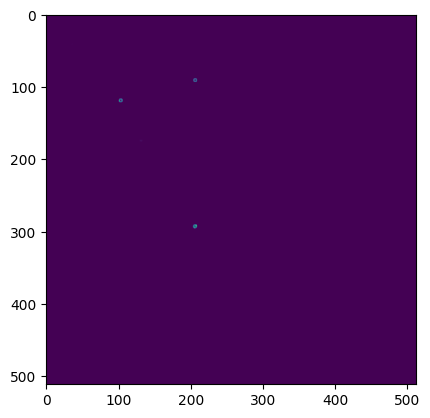

In [51]:
loss_fn = torch.nn.CrossEntropyLoss(reduction='none')

a = loss_fn(y_pred, y_gt[None].cuda())
plt.imshow(a.cpu()[0])

In [72]:
y = torch.argmax(y_pred, dim=1)
y_soft = torch.softmax(y_pred, dim=1)

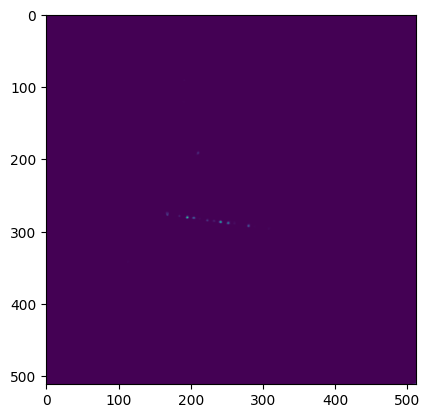

In [75]:
plt.imshow(y_soft[0, 2].cpu())

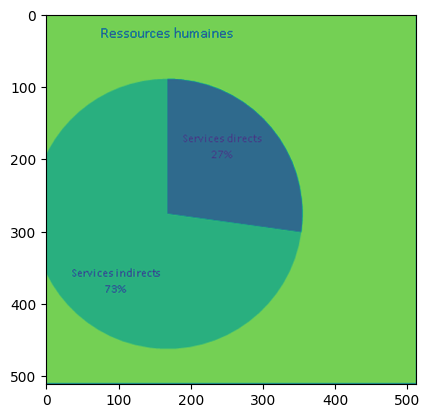

In [74]:
plt.imshow(x.cpu()[0])